In [ ]:
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO
import base64
import numpy as np
from IPython.display import display, Image as IPImage
from PIL import Image
from io import BytesIO
import wave

In [ ]:
from google.colab import userdata
#initiate api key
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

In [ ]:
#create ai client
client = genai.Client(api_key=GOOGLE_API_KEY)

In [ ]:
def generate_gemini_text(contents):
  response = client.models.generate_content(
      model="gemini-2.0-flash-lite",
      contents=contents,
      config=types.GenerateContentConfig(
        response_modalities=['TEXT', 'TEXT']
      )
  )
  for part in response.candidates[0].content.parts:
    if part.text is not None:
     return part.text



In [ ]:
def generate_gemini_image(description):
  description += " in the comic book style of spiderman"
  response = client.models.generate_content(
    model="gemini-2.0-flash-exp-image-generation",
    contents=description,
    config=types.GenerateContentConfig(
      response_modalities=['TEXT', 'IMAGE']
    )
)
  for part in response.candidates[0].content.parts:
    if part.inline_data is not None:
      image_data = part.inline_data.data
      return image_data # Return the image data

What should we make a comic about: wizards at work
How many panels should it be: 2


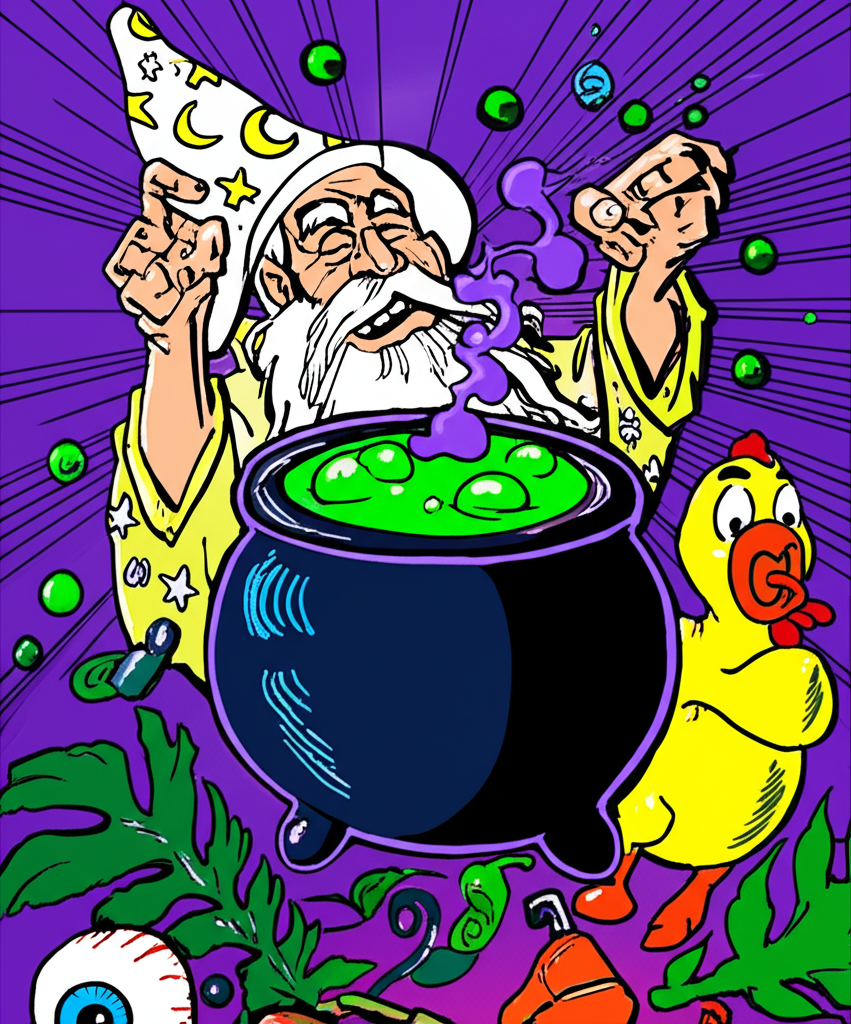

Panel 1 Caption:
"Right, now for a dash of... *squints* ...eyeball!"




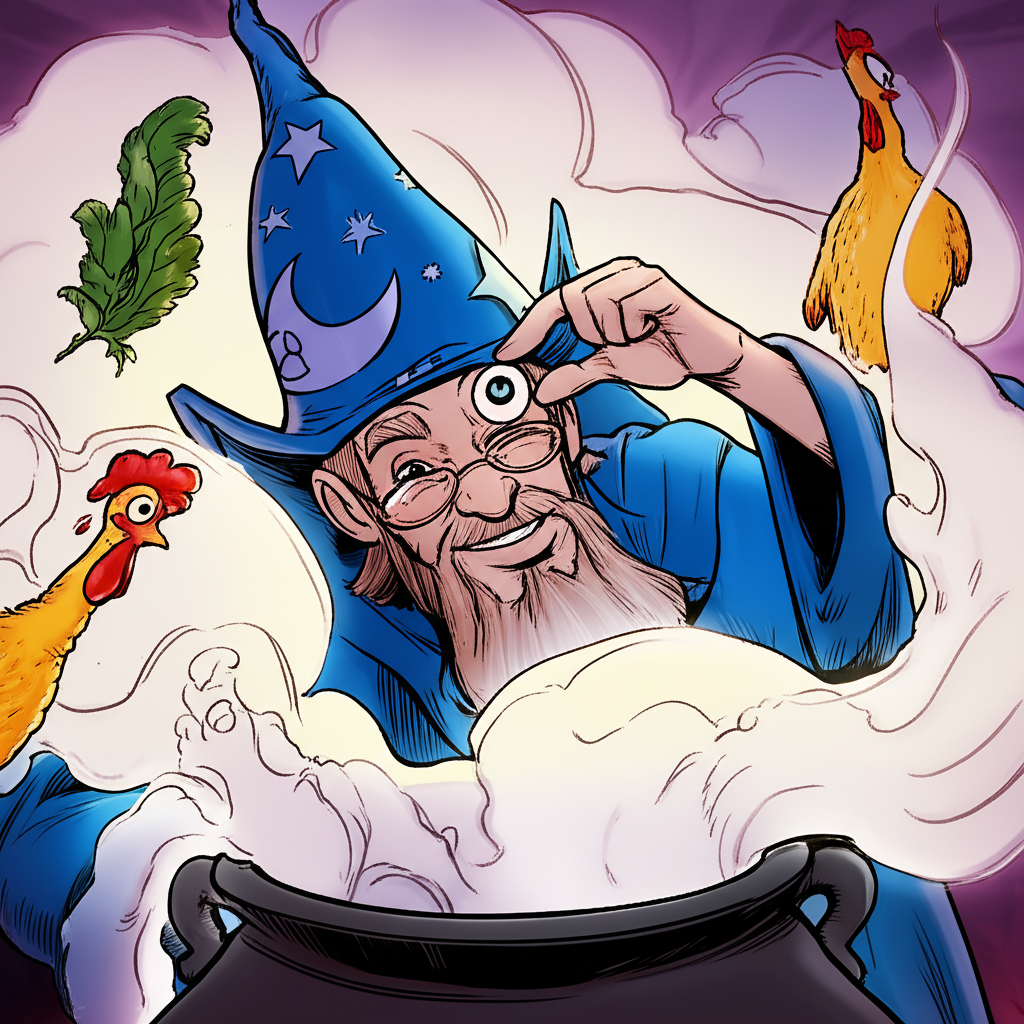

Panel 2 Caption:
"Perfect. Just a pinch of ocular magic."


Do you want to add another panel? (yes/no): no
Comic creation complete!


In [15]:
from IPython.display import display, Image as IPImage

comic_topic = input("What should we make a comic about: ")
comic_panels = int(input("How many panels should it be: "))

panel_array = []
caption_array = []

i = 0
while i < comic_panels:
    #Generate panel description
    description = (
        f"You are a comic strip writer. Write panel number {i+1} for a comic about {comic_topic}. "
        f"Respond ONLY with the description of the image in this panel. NO dialogue or extra text."
     f"Create a 3D comic panel scene: {image_desc}, with a speech bubble that says: '{caption}' "
  "in a cartoon comic book style with bright lighting."

    )
    if i > 0:
        description += " Keep in mind the previous panels: "
        for k in range(i):
            description += f"Panel {k+1} was {panel_array[k]}. "

    image_desc = generate_gemini_text(description)
    panel_array.append(image_desc)
    image_data = generate_gemini_image(image_desc)

    #Generate caption
    dialogue = (
        f"You are a comic strip writer. Write a caption for panel number {i+1} for a comic about {comic_topic}. "
        f"Respond ONLY with the caption/dialogue. The image will show: {image_desc}."
    )
    if i > 0:
        dialogue += " Keep in mind the previous panel captions: "
        for k in range(i):
            dialogue += f"Panel {k+1} had the caption: {caption_array[k]}. "

    caption = generate_gemini_text(dialogue)
    caption_array.append(caption)

    #Display image and caption
    display(IPImage(data=image_data, width = 200))
    print(f"Panel {i+1} Caption:\n{caption}\n")

    #Ask if user wants to continue
    i += 1
    if i == comic_panels:
        cont = input("Do you want to add another panel? (yes/no): ").strip().lower()
        if cont in ["yes", "y"]:
            comic_panels += 1
        else:
            print("Comic creation complete!")
            break
